Grafy a otázky:

- jak vlastně vypadal úplně první film + první hraný celovečerní film, okolnosti vzniku
- nedochované filmy
- nástup zvuku
- nesocialistická morálka v 50s
- nástup barvy a proč se v 60s přestává točit barevně
- proč v 80s mizejí komunisté
- privatizace: omezení produkce & konec monopolu
- koprodukce
- čeho jsem si nevšiml, co vystihuje současný film?

In [1]:
import os
import pandas as pd
pd.set_option('display.max_columns', None)
df = pd.read_json(os.path.join("data", "filmy.json"))

In [2]:
df.shape

(4506, 133)

In [3]:
(", ").join(df.columns.to_list())

'Film, Země původu, Copyright, Rok výroby, Premiéra, Minutáž, Režie, Kategorie, Žánr, Typologie, Originální název, Český název, Anglický název, Souběžný název, Pracovní název, Hrají, Postavy, Pomocná režie, Asistent režie, Původní filmový námět, Scénář, Dramaturg, Kamera, Asistent kamery, Architekt, Návrhy kostýmů, Masky, Střih, Zvuk, Producent, Vedoucí výroby, Zástupce vedoucího výroby, Odborný poradce, Hudba, Choreografie, Lokace, Distribuční slogan, Výrobce, S podporou, Nositelé copyrightu, Distribuce, Délka, Distribuční nosič, Poměr stran, Barva, Zvukový, Zvukový systém/formát, Verze, Mluveno, Podtitulky, Úvodní/závěrečné titulky, Anotace, Obsah, Technický scénář, Výtvarník, Animace, Triky, Postprodukce, Návrhy titulků, Pedagogické vedení, Použitá hudba, Studentský film, Původní metráž, Mezititulky, Ocenění, Poznámka, Mluví, Vizuální efekty, Vedoucí produkce, Předloha, Kaskadéři, Text písně, Zpívá, pásmo, Části, Produkce, Výtvarná spolupráce, Nahrál, Partner, Animační technika, Výp

<AxesSubplot:xlabel='Copyright'>

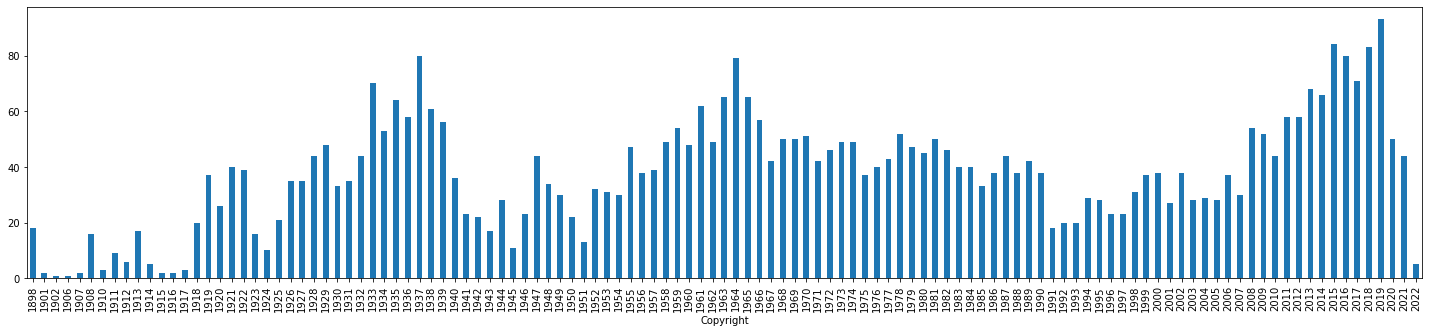

In [4]:
df.groupby("Copyright")["Film"].nunique().plot.bar(figsize=(25,5))

In [5]:
hcf = df[df["Délka"] == "dlouhometrážní"].explode("Typologie")
hcf = hcf[hcf["Typologie"] == "hraný"]

In [6]:
hcf.shape

(2514, 133)

<AxesSubplot:xlabel='Copyright'>

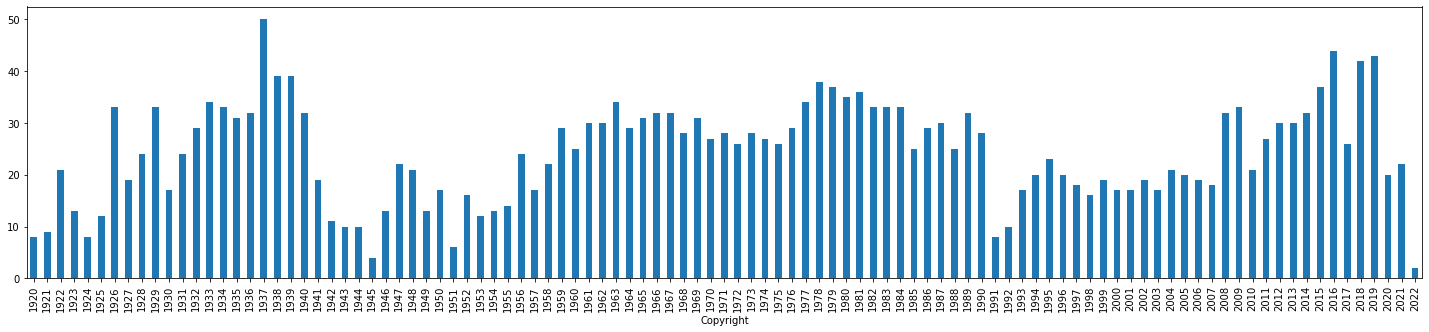

In [7]:
hcf.groupby("Copyright")["Film"].nunique().plot.bar(figsize=(25,5))

In [8]:
hcf.groupby("Copyright")["Film"].nunique().nsmallest(20)

Copyright
2022     2
1945     4
1951     6
1920     8
1924     8
1991     8
1921     9
1943    10
1944    10
1992    10
1942    11
1925    12
1953    12
1923    13
1946    13
1949    13
1954    13
1955    14
1952    16
1998    16
Name: Film, dtype: int64

In [9]:
hcf["Barva"].sample(10)

3033                    barevný
442                   černobílý
675                   černobílý
2042                    barevný
3677                    barevný
3113                    barevný
396                   černobílý
415     [virážovaný, černobílý]
964                   černobílý
266     [virážovaný, černobílý]
Name: Barva, dtype: object

<AxesSubplot:xlabel='Copyright'>

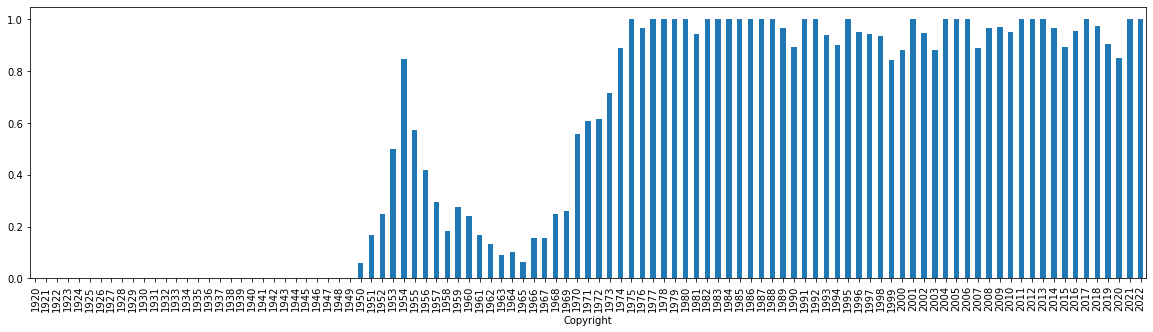

In [10]:
pd.Series(hcf[hcf["Barva"] == "barevný"].groupby("Copyright")["Film"].nunique() / hcf.groupby("Copyright")["Film"].nunique()).plot.bar(figsize=(20,5))

<AxesSubplot:xlabel='Copyright'>

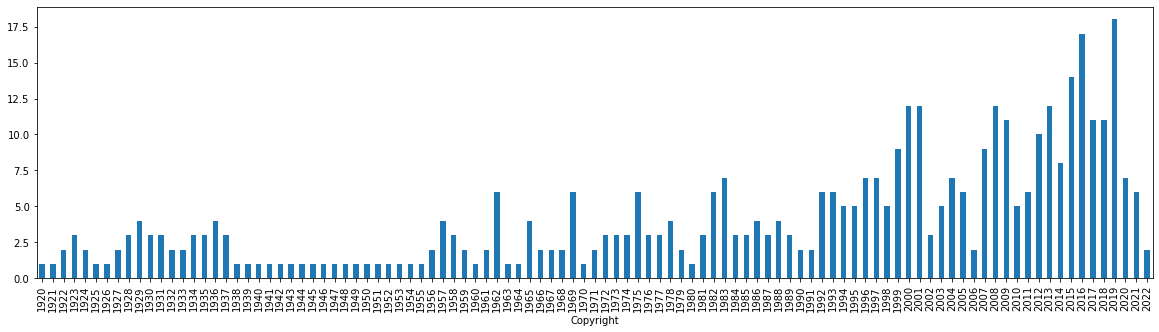

In [11]:
hcf.explode("Země původu").groupby("Copyright")["Země původu"].nunique().plot.bar(figsize=(20,5))

<AxesSubplot:xlabel='Copyright'>

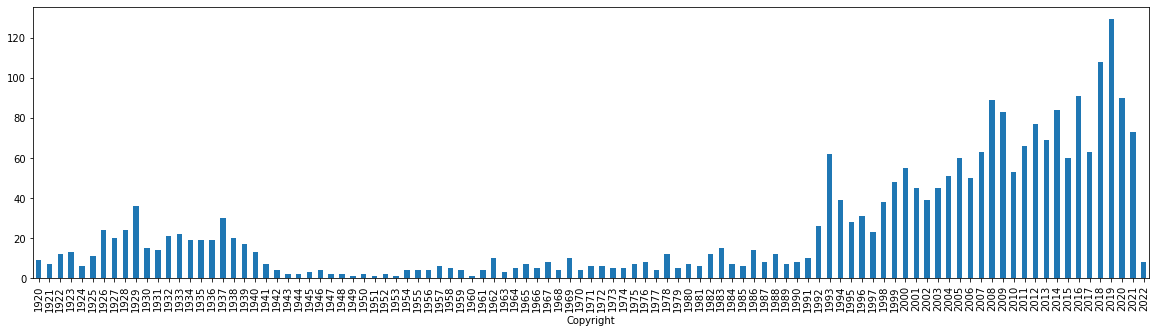

In [12]:
hcf.explode("Výrobce").groupby("Copyright")["Výrobce"].nunique().plot.bar(figsize=(20,5))

In [13]:
hcf[hcf["Copyright"] >= 1993].explode("Výrobce").groupby("Výrobce")["Film"].nunique().nlargest(15)

Výrobce
ČESKÁ TELEVIZE (92472)                         333
Filmové centrum (125132)                        89
innogy Česká republika a.s. (102179)            53
Rozhlas a televízia Slovenska (123177)          52
IN Film Praha spol. s r.o. (92591)              38
i/o post s.r.o. (101238)                        35
NEGATIV s.r.o. (92586)                          32
Universal Production Partners, a.s. (92762)     32
Barrandov Studio a.s. (92704)                   29
KRÁTKÝ FILM PRAHA a. s. [od 1991] (92610)       28
Slovenská televízia (94758)                     26
HBO Europe s.r.o. (93721)                       24
Soundsquare, a.s. (100417)                      24
CINEART TV Prague s.r.o. (92896)                23
Barrandov Studio a.s. (92664)                   22
Name: Film, dtype: int64

## Nedochované filmy

In [14]:
df["Stav filmu"].drop_duplicates()

0                          None
4                   nedochovaný
47     nedokončený, nedochovaný
169                 nedokončený
Name: Stav filmu, dtype: object

<AxesSubplot:xlabel='Copyright'>

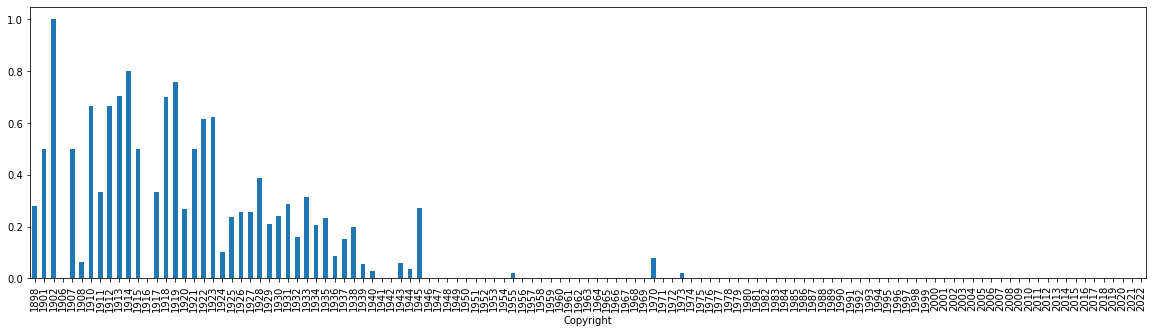

In [15]:
(df[df["Stav filmu"].str.lower().str.contains("nedocho",na=False)].groupby("Copyright")["Film"].nunique() / df.groupby("Copyright")["Film"].nunique()).plot.bar(figsize=(20,5))

In [16]:
nejobsazovanejsi_herci = df.explode("Hrají").groupby("Hrají")["Film"].nunique().nlargest(50).to_list()

In [17]:
nedochovane = df[df["Stav filmu"].str.lower().str.contains("nedocho",na=False)].explode("Hrají")

In [18]:
nedochovane.groupby("Hrají")["Film"].nunique().nlargest(10)

Hrají
Theodor Pištěk (37366)             33
Jan W. Speerger (55928)            27
Josef Šváb-Malostranský (55291)    22
Karel Lamač (37847)                21
Suzanne Marwille (127373)          17
Karel Schleichert (83230)          15
Marie Oliaková (124867)            14
Alois Sedláček (126991)            13
Josef Rovenský (37766)             13
Luigi Hofman (125431)              13
Name: Film, dtype: int64

In [19]:
nedochovane[nedochovane["Hrají"] == "Vlasta Burian (11992)"]

,Film,Země původu,Copyright,Rok výroby,Premiéra,Minutáž,Režie,Kategorie,Žánr,Typologie,Originální název,Český název,Anglický název,Souběžný název,Pracovní název,Hrají,Postavy,Pomocná režie,Asistent režie,Původní filmový námět,Scénář,Dramaturg,Kamera,Asistent kamery,Architekt,Návrhy kostýmů,Masky,Střih,Zvuk,Producent,Vedoucí výroby,Zástupce vedoucího výroby,Odborný poradce,Hudba,Choreografie,Lokace,Distribuční slogan,Výrobce,S podporou,Nositelé copyrightu,Distribuce,Délka,Distribuční nosič,Poměr stran,Barva,Zvukový,Zvukový systém/formát,Verze,Mluveno,Podtitulky,Úvodní/závěrečné titulky,Anotace,Obsah,Technický scénář,Výtvarník,Animace,Triky,Postprodukce,Návrhy titulků,Pedagogické vedení,Použitá hudba,Studentský film,Původní metráž,Mezititulky,Ocenění,Poznámka,Mluví,Vizuální efekty,Vedoucí produkce,Předloha,Kaskadéři,Text písně,Zpívá,pásmo,Části,Produkce,Výtvarná spolupráce,Nahrál,Partner,Animační technika,Výprava,Spolupráce,Komentář,Autor komentáře,Druhá kamera,Zvláštní efekty,Koproducent,Výběr hudby,Hudební dramaturgie,Písně,"Hudba, text a zpěv písně",Produkční data,Koordinátor kaskadérů,Výkonná produkce,Zástupce vedoucího produkce,Hudební režie,Účinkují,Dirigent,Ateliéry,Režie české verze,Výrobce české verze,Tančí,České podtitulky,Výrobce českých podtitulků,Asistent vedoucího produkce,Natáčecí formát,Dialogy české verze,Autor projektu,Stav filmu,Souběžný anglický název,Assistent architekta,Asistent zvuku,Podnázev,Asistent vedoucího výroby,Skript,Kostýmy,Asistent střihu,povídkový film,Povídky,Hudba k písni,Prodej práv,Podnázev anglický,Výtvarník pozadí,Výrobní skupina,Zákazník,Vývozní společnost,Umělecké vedení,Zpěv role,Překlad české verze,Rychlost,Přístupnost,Začátek výroby,Konec výroby
255,Tu ten kámen (395326),Československo,1923,1923,premiéra 7. 9. 1923 /nepřístupný mládeži/ (kin...,64.0,[Karel Anton (37987)],film,komedie,"[hraný, distribuční]",Tu ten kámen,Tu ten kámen,Tutankhamen,Kterak láskou možno v mžiku vzplanout třeba k ...,None,Vlasta Burian (11992),"[Fridolín, egyptolog Rapapides Bulva, starosta...",None,None,[Karel Anton (37987)],[Karel Anton (37987)],None,[Otto Heller (127281)],None,"[Bohuslav Šula (127389), František Poneš (1279...",None,None,None,None,None,None,None,None,None,None,[],Nejrozpustilejší česká veselohra. V hlavních ú...,[Anton (127987)],None,[Národní filmový archiv (92324)],[Julius Schmitt (127299)],dlouhometrážní,35mm,1.33,černobílý,němý,None,česká,bez dialogů,bez titulků,české,None,Hrdinou příběhu je mladý sličný asistent slavn...,None,None,None,None,None,None,None,None,None,1800.0,české,None,První filmová role Vlasty Buriana. Filmové mat...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Jaroslav Balzar (124087), Jaroslav Balzar]",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,AB Vinohrady,None,None,None,None,None,None,None,None,None,nedochovaný,"How Love Can Flame in an Instant, Even for the...",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1923,1923


In [20]:
nedochovane.groupby("Film")["Copyright"].max().nlargest(10)

Film
Pytagorejci (396963)             1973
A v tom zámku... (400451)        1970
Anně K. je zima (400452)         1970
Hippokratova přísaha (400450)    1970
Návštěvy (400449)                1970
Vzorný fízl (401944)             1955
Jenom krok (396005)              1945
Pošťácká pohádka (398617)        1945
Z růže kvítek (396004)           1945
Předtucha (395984)               1944
Name: Copyright, dtype: int64

In [21]:
nedochovane[nedochovane["Délka"] == "dlouhometrážní"].groupby("Film")["Copyright"].max().nlargest(10)

Film
Jenom krok (396005)                         1945
Z růže kvítek (396004)                      1945
Předtucha (395984)                          1944
Královna stříbrných hor (395855)            1939
Cikánská láska (395810)                     1938
Panenka [německá verze] (395803)            1938
Boží mlýny [německá verze] (395806)         1937
Lidé pod horami [německá verze] (395804)    1937
Ze všech jediná [německá verze] (395808)    1937
Pan otec Karafiát (395673)                  1935
Name: Copyright, dtype: int64

## Nástup zvuku

<AxesSubplot:xlabel='Copyright'>

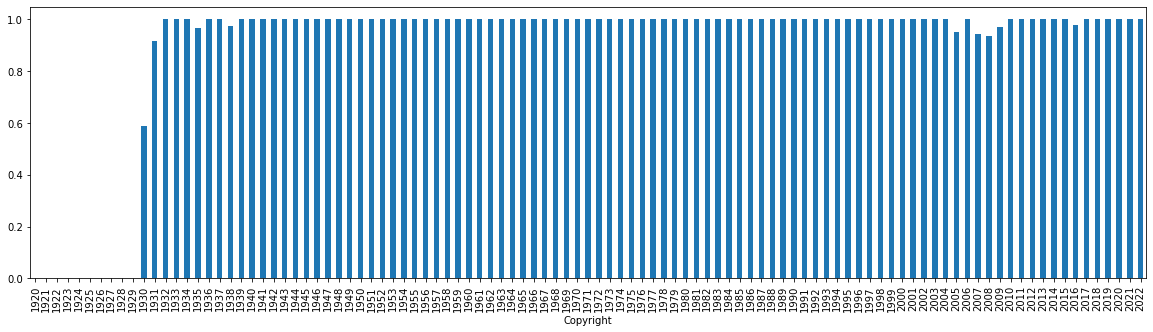

In [22]:
pd.Series(hcf[hcf["Zvukový"] == "zvukový"].groupby("Copyright")["Film"].nunique() / hcf.groupby("Copyright")["Film"].nunique()).plot.bar(figsize=(20,5))

## Obsahy

In [23]:
hcf["Délka obsahu"] = hcf["Obsah"].apply(lambda x: len(x) if x else 0)

<AxesSubplot:xlabel='Copyright'>

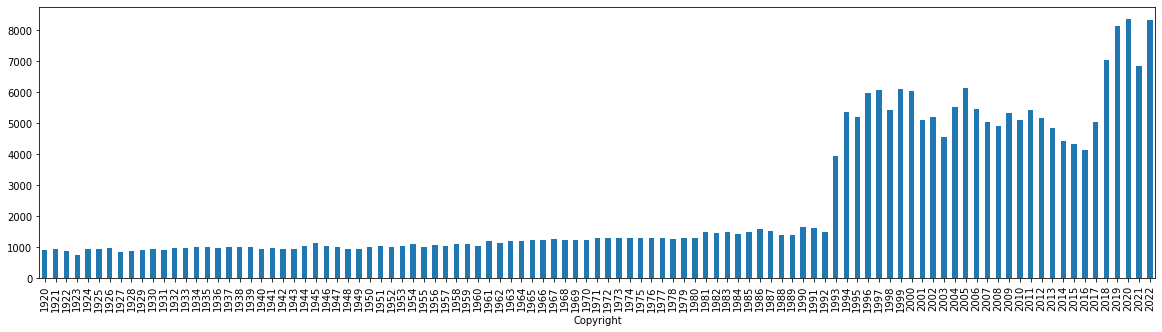

In [24]:
hcf.groupby("Copyright")["Délka obsahu"].median().plot.bar(figsize=(20,5))

Metodologický problém: porevoluční obsahy jsou delští, tzn. detailnější. Pomůžeme si prosekáním: necháme začátek, prostředek a konec.

In [25]:
hcf[hcf["Copyright"] <= 1992]["Délka obsahu"].mean()

1235.427455357143

In [26]:
def zkrat_obsah(obsah):
    if not obsah:
        pass
    elif len(obsah) < 1000:
        pass
    else:
        zacatek = obsah[0:333]
        konec = obsah[-333:]
        prostredek = len(obsah)
        prostredek = obsah[prostredek-166:prostredek+166]
        obsah = f"{zacatek} {prostredek} {konec}"
    return(obsah)

In [27]:
hcf["Obsah1k"] = hcf["Obsah"].apply(lambda x: zkrat_obsah(x))

In [28]:
hcf["Obsah1k délka"] = hcf["Obsah1k"].apply(lambda x: len(x) if x else 0)

<AxesSubplot:xlabel='Copyright'>

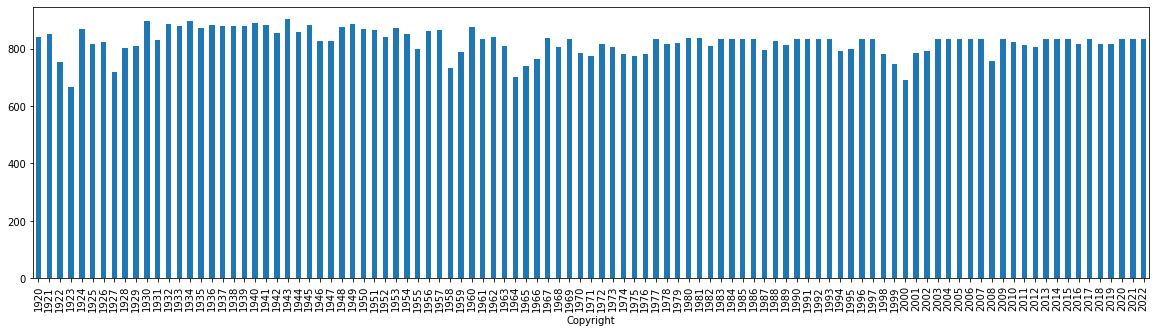

In [29]:
hcf.groupby("Copyright")["Obsah1k délka"].mean().plot.bar(figsize=(20,5))

<AxesSubplot:xlabel='Copyright'>

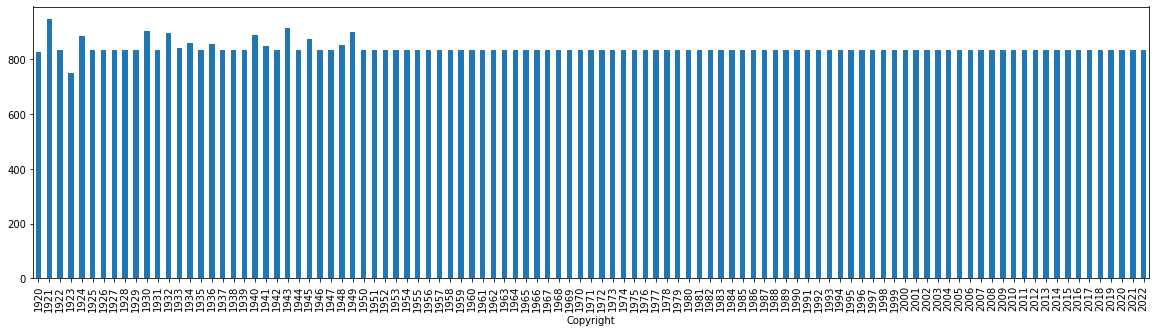

In [30]:
hcf.groupby("Copyright")["Obsah1k délka"].median().plot.bar(figsize=(20,5))

In [31]:
def jak_casto (slovo):
    df_pracovni = hcf[["Copyright","Film","Obsah1k","Minutáž"]]
    cetnost = df_pracovni[df_pracovni["Obsah1k"].str.lower().str.contains(slovo,regex=True,na=False)].groupby("Copyright")["Film"].nunique() / df_pracovni.groupby("Copyright")["Film"].nunique()
    cetnost.plot.bar(figsize=(20,5))
    return(cetnost)

Nejdřív zkusíme "když" – zjistíme tak, jestli někde něco nechybí.

Copyright
1920    0.125000
1921    0.666667
1922    0.428571
1923    0.307692
1924    0.375000
          ...   
2018    0.190476
2019    0.372093
2020    0.100000
2021    0.227273
2022         NaN
Name: Film, Length: 103, dtype: float64

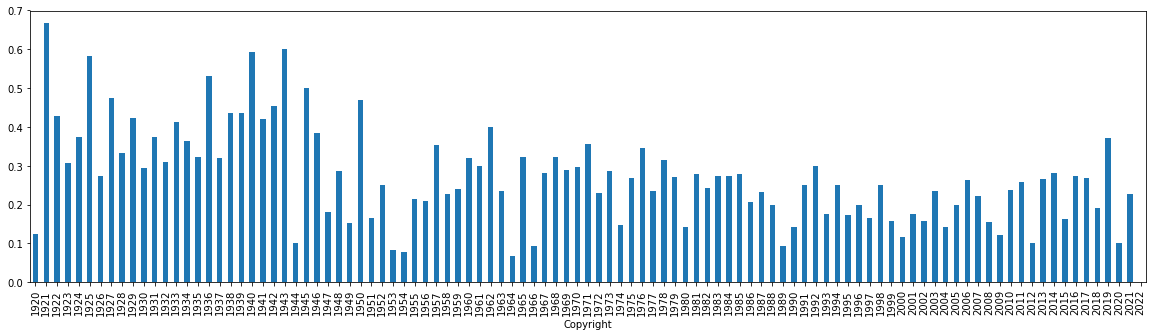

In [32]:
jak_casto("když")

Hurá, nechybí!

C:\Users\micha\AppData\Local\Temp\ipykernel_7300\1085284462.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  cetnost = df_pracovni[df_pracovni["Obsah1k"].str.lower().str.contains(slovo,regex=True,na=False)].groupby("Copyright")["Film"].nunique() / df_pracovni.groupby("Copyright")["Film"].nunique()


Copyright
1920    0.125000
1921    0.222222
1922    0.095238
1923    0.307692
1924    0.250000
          ...   
2018    0.047619
2019    0.069767
2020    0.100000
2021         NaN
2022         NaN
Name: Film, Length: 103, dtype: float64

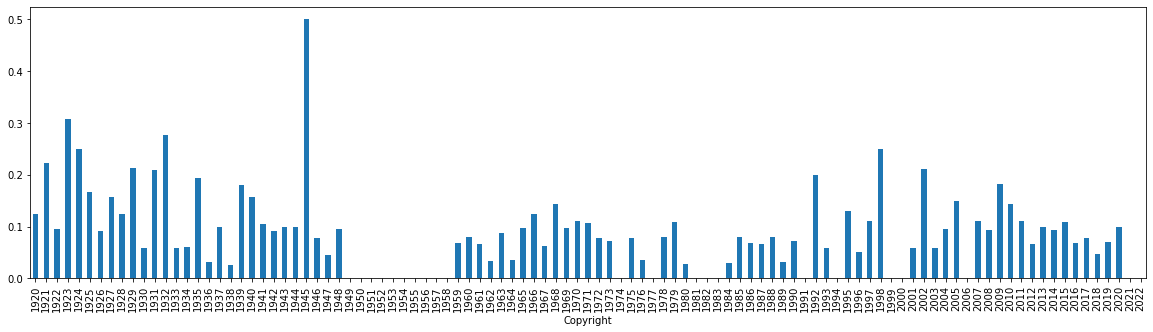

In [33]:
jak_casto("(milenk|milence|milenec|poměr[^\w]|nemanželsk)")

C:\Users\micha\AppData\Local\Temp\ipykernel_7300\1085284462.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  cetnost = df_pracovni[df_pracovni["Obsah1k"].str.lower().str.contains(slovo,regex=True,na=False)].groupby("Copyright")["Film"].nunique() / df_pracovni.groupby("Copyright")["Film"].nunique()


Copyright
1920        NaN
1921        NaN
1922        NaN
1923        NaN
1924        NaN
         ...   
2018    0.02381
2019        NaN
2020        NaN
2021        NaN
2022        NaN
Name: Film, Length: 103, dtype: float64

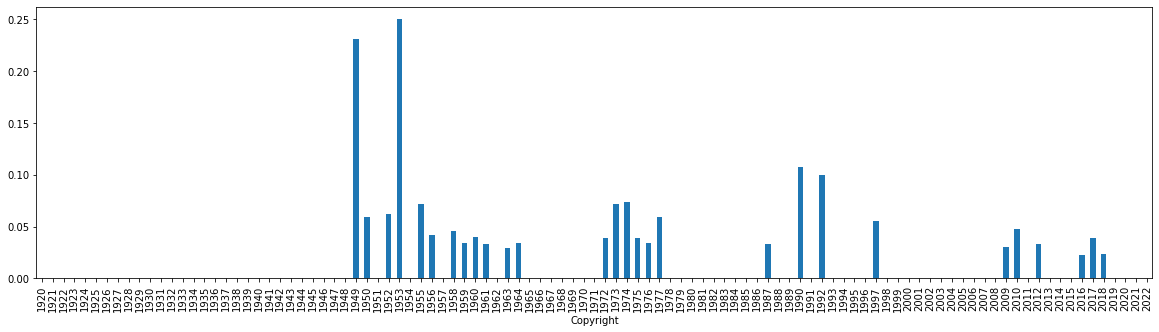

In [34]:
jak_casto("(komunis|KSČ)")

## Komu patří český film?

In [36]:
df.explode("Nositelé copyrightu").groupby("Nositelé copyrightu")["Film"].nunique().nlargest(30)

Nositelé copyrightu
Národní filmový archiv (92324)                                          1985
Státní fond kinematografie (124966)                                      918
ČESKÁ TELEVIZE (92472)                                                   501
Filmová a televizní fakulta Akademie múzických umění v Praze (92300)      84
Rozhlas a televízia Slovenska (123177)                                    72
NEGATIV s.r.o. (92586)                                                    52
KRÁTKÝ FILM PRAHA a. s. [od 1991] (92610)                                 35
Universal Production Partners, a.s. (92762)                               33
i/o post s.r.o. (101238)                                                  33
Bionaut s.r.o. (100839)                                                   28
endorfilm s.r.o. (99496)                                                  28
innogy Česká republika a.s. (102179)                                      27
CINEART TV Prague s.r.o. (92896)                        